In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [32]:
# Veri Setimizi Okuduk
data = pd.read_csv("DATA/Land mines.csv")

In [33]:
data.head()

,V,H,S,M
0,0.338157,0.000000,1,1
1,0.320241,0.181818,1,1
2,0.287009,0.272727,1,1
3,0.256284,0.454545,1,1
4,0.262840,0.545455,1,1


In [34]:
# Veri setinden özellikleri ve etiketleri ayır
X = data.drop("M", axis=1).values
y = data["M"].values

In [35]:
# Özellikleri standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# Diana kümeleme algoritması
def diana(X, k):
    n = X.shape[0]  # Veri noktalarının sayısı
    clusters = [[i] for i in range(n)]  # Başlangıçta her veri noktası bir küme

    while len(clusters) > k:
        max_dist = -1
        merge_i = -1
        merge_j = -1

        # En büyük mesafeyi bul
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = np.linalg.norm(np.mean(X[clusters[i]], axis=0) - np.mean(X[clusters[j]], axis=0))
                if dist > max_dist:
                    max_dist = dist
                    merge_i = i
                    merge_j = j

        # İki kümenin birleştirilmesi
        clusters[merge_i].extend(clusters[merge_j])
        del clusters[merge_j]

    return clusters

In [39]:
# Kümeleme sonuçlarını görselleştirme
def visualize_clusters(X, clusters):
    # Her küme için farklı renkler
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for i, cluster in enumerate(clusters):
        cluster_points = X[cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

    plt.xlabel('Voltaj')
    plt.ylabel('Yükseklik')
    plt.title('Diana Clustering')
    plt.legend()
    plt.show()

In [40]:
# Diana kümeleme
k = 5  # Küme sayısı
clusters = diana(X_scaled, k)

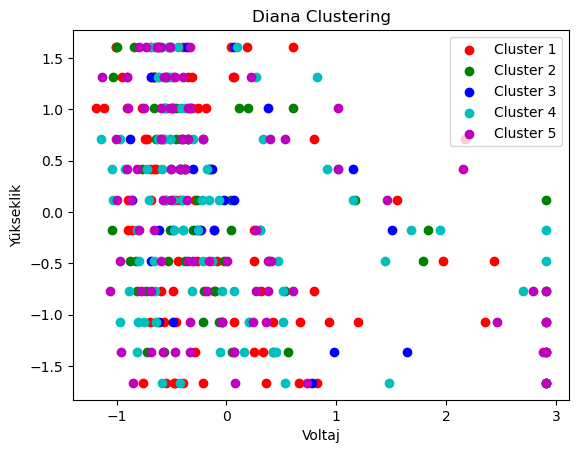

In [41]:
visualize_clusters(X_scaled, clusters)

In [42]:
# Gerçek etiketlerin yüklenmesi
true_labels = data['M']

In [43]:
# Kümeleme sonuçlarının indekslerini yeniden düzenleme
cluster_labels = np.zeros_like(true_labels)
for i, cluster in enumerate(clusters):
    for point_idx in cluster:
        cluster_labels[point_idx] = i

In [44]:
# Ortalama Kare Hatasının hesaplanması
mse = mean_squared_error(true_labels, cluster_labels)
print("Ortalama Kare Hatası:", mse)

Ortalama Kare Hatası: 4.991124260355029
